# XGBoost + k-fold CV + Feature Importance

As we all know that a lot of competitions were won using only one algorithm - **XGBoost**. It is one of the most popular machine learning algorithm these days. It works well for both types of tasks - regression and classification.

So, in this kernel, we will discuss XGBoost and develop a simple baseline XGBoost model with Python.

## Introduction to XGBoost Algorithm

- **XGBoost** stands for **Extreme Gradient Boosting.**

- It is a performant machine learning library based on the paper [Greedy Function Approximation: A Gradient Boosting Machine, by Friedman](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)

- It is an open source machine learning library providing a high-performance implementation of gradient boosted decision trees.

- It is originally written in C++ and is comparatively faster than other ensemble classifiers.

- It belongs to a family of boosting algorithms and uses the **gradient boosting (GBM)** framework at its core. 

- XGBoost implements a [Gradient Boosting algorithm](https://en.wikipedia.org/wiki/Gradient_boosting) based on decision trees.

- So, to understand XGBoost completely, we need to understand **Gradient Boosting Algorithm** (discussed later).

- Please follow the links below for more in-depth discussion on XGBoost.

    [XGBoost Official Documentation](https://xgboost.readthedocs.io/en/latest/)

    [XGBoost from Wikipedia](https://en.wikipedia.org/wiki/XGBoost)

### Evolution of tree-based algorithms

- The tree based algorithms have evolved over the years.

- XGBoost belongs to a family of tree-based algorithms.

- Please see the chart below for the evolution of tree-based algorithms over the years.

:::{figure-md}
<img src="../../../images/ml-advanced/xgboost_k_fold_cv_feature_importance/Evolution_of_tree_based_algorithms.jpg" width="90%" class="bg-white mb-1">

Evolution of tree-based algorithms
:::

### Main features of XGBoost

- The primary reasons we should use this algorithm are its **accuracy**, **efficiency** and **feasibility**. 

- It is a linear model and a [tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm that does parallel computations on a single machine. 

- It also has extra features for doing cross validation and computing feature importance. 

- Given below are some of the main features of the model:

  - **Sparsity** : It accepts sparse input for tree booster and linear booster.
  
  - **Customization** : It supports customized objective and evaluation functions.
  
  - **DMatrix** : Its optimized data structure that improves its performance and efficiency.
  
## Bagging Vs Boosting

- To know bagging and boosting, we need to know ensemble methods.

- Ensemble methods combine several decision trees to produce better predictive performance than utilizing a single decision tree. 

- The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.

- Now, we will talk about two techniques to perform ensemble decision trees. These are as follows:

  - Bagging

  - Boosting
  
- You can follow the link below for more in-depth discussion on Bagging and Boosting.

    [Bagging vs Boosting](https://www.kaggle.com/prashant111/bagging-vs-boosting)

### Bagging

- Bagging (or Bootstrap Aggregation), is a simple and very powerful ensemble method. 

- Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

- The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. 

- Bagging technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

- Bagging had each model run independently and then aggregate the outputs at the end without preference to any model.

- Bagging can be depicted with the following diagram：

:::{figure-md}
<img src="../../../images/ml-advanced/xgboost_k_fold_cv_feature_importance/Process_of_bagging.webp" width="90%" class="bg-white mb-1">

Process of Bagging
:::

### Boosting

- Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

- In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

- When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. By combining the whole set at the end converts weak learners into better performing model.

- Boosting is another ensemble technique to create a collection of models. 

- Boosting can be depicted with the following diagram:

:::{figure-md}
<img src="../../../images/ml-advanced/xgboost_k_fold_cv_feature_importance/Process_of_boosting.webp" width="90%" class="bg-white mb-1">

Process of Boosting
:::

## XGBoost algorithm intuition

- XGBoost is a powerful and lightning fast machine learning library. It’s commonly used to win some professional level competitions. 

- It’s an intimidating algorithm, especially because of the number of large parameters that XGBoost provides.

- Also, there is some confusion regarding gradient boosting, gradient boosted trees and XGBoost.

- So, in this section, we will discuss - **gradient boosting**, **gradient boosted trees** and **XGBoost**. The purpose of this section is to clarify these concepts.

### Gradient boosting

- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

- It builds the model in a stage-wise fashion like other boosting methods do and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

- The objective of any supervised learning algorithm is to define a loss function and minimize it. The same is true for Gradient Boosting algorithm. Here, we have mean squared error (MSE) as loss-function defined as follows:

$$ Loss = MSE = \sum(y_i-y_i^p)^2 $$

- where $y_i = ith$ target value, $y_i^p = ith$ prediction, $L(y_i,y_i^p)$ is loss function

- We want our predictions, such that our loss function (MSE) is minimum. 

- By using gradient descent and updating our predictions based on a learning rate, we can find the values where MSE is minimum.

- It can be depicted as follows:

$$ y_i^p = y_i^p + a * \sigma\sum(y_i - y_i^p)^2/\sigma y_i^p $$

- which becomes, $y_i^p = y_i^p - a * 2 * \sum(y_i - y_i^p)$

- where, $a$ is learning rate and $\sum(y_i-y_i^p)$ is sum of residuals

- So, we are basically updating the predictions such that the sum of our residuals is close to 0 (or minimum) and predicted values are sufficiently close to actual values.

- Now, we train our second model on the gradient of the error with respect to the loss predictions of the first model. Thus, we should correct the mistakes of the first model. 

- This is the core of gradient boosting, and what allows many simple models to compensate for each other’s weaknesses to better fit the data.

- Gradient Boosting is an iterative procedure. So, we will repeat the above process over and over again. Each time we fit a new model to the gradient of the error of the updated sum of models.

- So, gradient boosting is a method for optimizing the function F, but it doesn’t really care about h (since nothing about the optimization of h is defined). This means that any base model h can be used to construct F.

### Gradient Boosted Trees

- Gradient boosted trees consider the special case where the simple model h is a decision tree. 

- It can be depicted with the following diagram which is taken from XGBoost’s documentation.

:::{figure-md}
<img src="../../../images/ml-advanced/xgboost_k_fold_cv_feature_importance/Gradient_boosted_trees.png" width="90%" class="bg-white mb-1">

Gradient Boosted Trees
:::

- In this case, there are 2 kinds of parameters P - **the weights at each leaf w** and **the number of leaves T in each tree** (so that in the above example, T=3 and w=[2, 0.1, -1]).

- When building a decision tree, a challenge is to decide how to split a current leaf. For instance, in the above image, how could we add another layer to the (age > 15) leaf. 

- A ‘greedy’ way to do this is to consider every possible split on the remaining features (so, gender and occupation), and calculate the new loss for each split. We could then pick the tree which most reduces our loss.

:::{figure-md}
<img src="../../../images/ml-advanced/xgboost_k_fold_cv_feature_importance/New_tree_minimizing_loss.png" width="90%" class="bg-white mb-1">

New Tree minimizing loss
:::

- In addition to finding the new tree structures, the weights at each node need to be calculated as well, such that the loss is minimized. Since the tree structure is now fixed, this can be done analytically now by setting the loss function = 0.

- After derivation, we get the following result.

$$ w_j = \frac{\sum_{i\in I_j} \frac{\partial loss}{\partial (\hat{y}=0)}}{\sum_{i\in I_j}(\frac{\partial^2 loss}{\partial (\hat{y}=0)^2})+ \lambda} $$

- Where $I_j$ is a set containing all the instances ((x, y) datapoints) at a leaf, and $w_j$ is the weight at leaf j. 

- This looks more intimidating than it is; for some intuition, if we consider $loss = MSE =(y-\hat{y})^2$, then taking the first and second gradients where $\hat{y} =0$ yields

$$ w_j = \frac{\sum_{i\in I_j} y}{\sum_{i\in I_j} 2 + \lambda} $$

- Here, the weights effectively become the average of the true labels at each leaf (with some regularization from the λ constant).

### Extreme gradient boosting (XGBoost)

- XGBoost is one of the fastest implementations of gradient boosted trees. It does this by tackling one of the major inefficiencies of gradient boosted trees. 

- Consider the case where there are thousands of features, and therefore thousands of possible splits. Now, if we consider the potential loss for all possible splits to create a new branch we have thousands of potential splits and losses.

- XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits.

- Although XGBoost implements a few regularization tricks, this speed up is by far the most useful feature of the library, allowing many hyperparameter settings to be investigated quickly. 

- This is helpful because there are many hyperparameters to tune which are designed to limit overfitting.

## Implementing XGBoost in Python

### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read dataset

In [2]:
data = '../../assets/data/wholesale_customers_data.csv'

df = pd.read_csv(data)

### EDA

#### Shape of dataset

- I will start off by checking the shape of the dataset.

In [3]:
df.shape

(440, 8)

We can see that there are 440 instances and 8 attributes in the dataset.

#### Preview dataset

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- We can see that `Channel` variable contains values as 1 and 2. 

- These two values classify the customers from two different channels as
     - 1 for Horeca (Hotel/Retail/Café) customers and 
     - 2 for Retail channel (nominal) customers.
     
#### Summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Summary statistics of dataset

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Check for missing values

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We can see that there are no missing values in the dataset.

### Declare feature vector and target variable

In [8]:
X = df.drop('Channel', axis=1)

y = df['Channel']

- Now, let's take a look at feature vector(X) and target variable(y).

In [9]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [10]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

- We can see that the y label contain values as 1 and 2. 

- We will need to convert it into 0 and 1 for further analysis. 

- We will do it as follows:

In [11]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [12]:
# again preview the y label

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

- Now, we will convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains. 

- We will do it as follows:

In [13]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Split data into separate training and test set

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Train the XGBoost Classifier

- In order to train the XGBoost classifier, we need to know different parameters that XGBoost provides.

- We will discuss these parameters in later sections.

- Now, its time to train the XGBoost Classifier.

- We will proceed as follows:

In [15]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

we can view the parameters of the xgb trained model as follows:

In [16]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)


### Make predictions with XGBoost classifier

In [17]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

### Check accuracy score

In [18]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8864


We can see that XGBoost obtain accuracy score of 88.64%.

## k-fold Cross Validation using XGBoost

- To build more robust models with XGBoost, we should always perform k-fold cross validation. 

- In this way, we ensure that the original training dataset is used for both training and validation. 

- Also, each entry is used for validation just once. 

- XGBoost supports k-fold cross validation using the cv() method. 

- In this method, we will specify several parameters which are as follows:

  - **nfolds** - This parameter specifies the number of cross-validation sets we want to build.

  - **num_boost_round** - It denotes the number of trees we build.

  - **metrics** - It is the performance evaluation metrics to be considered during CV.

  - **as_pandas** - It is used to return the results in a pandas DataFrame.

  - **early_stopping_rounds** - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

  - **seed** - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.

In [19]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

- **xgb_cv** contains train and test auc metrics for each boosting round. 

- Let's preview **xgb_cv**.

In [20]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.943324,0.006457,0.934649,0.014371
1,0.948799,0.003750,0.940217,0.016186
2,0.951123,0.002962,0.934832,0.013417
3,0.952655,0.007380,0.938874,0.008080
4,0.950791,0.008281,0.930808,0.013547


## Feature importance with XGBoost

- XGBoost provides a way to examine the importance of each feature in the original dataset within the model. 

- It involves counting the number of times each feature is split on across all boosting trees in the model. 

- Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

- We will proceed as follows:

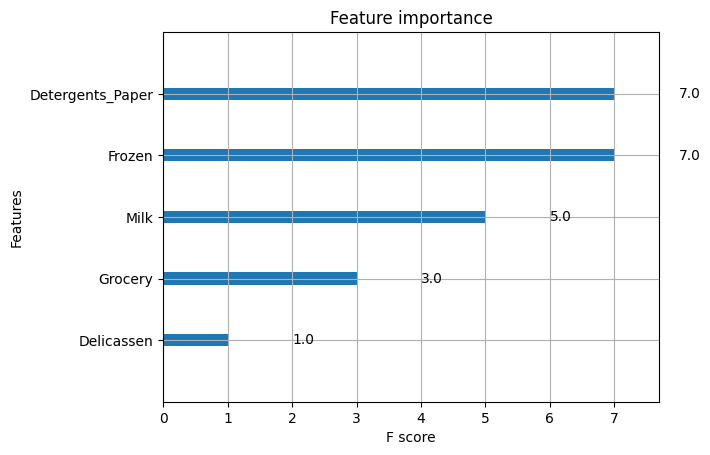

<Figure size 1600x1200 with 0 Axes>

In [21]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

- We can see that the feature `Delicassesn` has been given the highest importance score among all the features. 

- Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.

- Thus XGBoost also gives us a way to do feature selection.

## Results and conclusion

- In this kernel, we implement XGBoost with Python and Scikit-Learn to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

- The y labels contain values as 1 and 2. We have converted them into 0 and 1 for further analysis.

- We have trained the XGBoost classifier and found the accuracy score to be 88.64%.

- We have performed k-fold cross-validation with XGBoost.

- We have find the most important feature in XGBoost. We did it using the plot_importance() function in XGBoost that helps us to achieve this task.

## Your turn! 🚀

TBD

## Acknowledgments

Thanks to [Prashant Banerjee](https://www.kaggle.com/prashant111) for creating the open-source course [XGBoost + k-fold CV + Feature Importance](https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance). It inspires the majority of the content in this chapter.